# CZ1115 : Data Science and Artificial Intelligence (DSAI)
## Mini Project 
#### Group Members:
- Lee Yew Chuan, Michael<br>
- Teo I-Jen<br>
- Chua Wen Rong, Jonathan<br>

#### Data Sets / API Explored:
- Movie Data Base: https://developers.themoviedb.org/3/discover/movie-discover



## Problem Statement:
### If we were movie directors, how do we ensure our movie does well?    
In this notebook, we will be taking a look at which variables affects the revenue of a movie.
####  Table of Contents:
   1. Dataset Preparation
   2. Exploratory Data Analysis & Analytic Visualisation
   3. Explore Machine Learning with Random Forest Regressor
   4. Predictions (model performance on predicting 'revenue')


# 1. Dataset Preparation
>In this section, we will be preparing and cleaning our datasets.

In [4]:
# import config # to hide TMDB API keys
import requests # to make TMDB API calls
import locale # to format currency as USD
locale.setlocale( locale.LC_ALL, '' )

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.ticker import FuncFormatter # to format currency on charts axis

api_key = '34ec81365605658080e05ea53cbf69f2'

### Identification of Potentially Useful Variables

>We have selected ["film", "release_date", "revenue", "budget", "popularity", "vote_count", "runtime", "genres", "adult", "original_language"] from the API as potential variables.
We'll create our main dataframe here.

In [5]:
# Initialise an empty dataframe
columns = ["film", "release_date", "revenue", "budget", "popularity", "vote_count", "runtime", "genres", "adult", "original_language"]
df = pd.DataFrame(columns=columns)
dfTemp = pd.DataFrame(columns=columns)

In [6]:
for pageNum in range(50, 420):
    # Call new page to get list of movies
    response = requests.get("https://api.themoviedb.org/3/discover/movie?api_key=34ec81365605658080e05ea53cbf69f2&language=en-US&include_adult=false&include_video=false&page=" + str(pageNum))

    # Store the parsed JSON
    listMovies = response.json()

    # Get list of movies 
    listMovies = listMovies['results']
    
    for movie in listMovies:
        # Get the details of a specific movie
        movie_details = requests.get('https://api.themoviedb.org/3/movie/'+ str(movie['id']) +'?api_key='+ '34ec81365605658080e05ea53cbf69f2'+'&language=en-US')
        movie_details = movie_details.json()
        
        # Append entry into the dataframe
        try:
          dfTemp.loc[len(dfTemp)]=[movie['title'], movie_details["release_date"], movie_details['revenue'], movie_details['budget'], movie_details["popularity"], movie_details["vote_count"],\
movie_details["runtime"], movie_details["genres"], movie_details["adult"], movie_details["original_language"]]
        except KeyError:
          pass
    
    # concat temp dataframe into master
    df = pd.concat([df, dfTemp])

    # empty the temp dataframe
    dfTemp = dfTemp[0:0]

### Unique Movie Index
>We gave the movies unique indexes, which allows us to identify them easily.

In [7]:
# Reset the index
df.reset_index(drop=True, inplace=True)

# print the dataframe
df

,film,release_date,revenue,budget,popularity,vote_count,runtime,genres,adult,original_language
0,The Intouchables,2011-11-02,426588510,13000000,43.876,13226,113,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",False,fr
1,A Dog's Journey,2019-05-03,2520000,0,43.845,886,120,"[{'id': 10751, 'name': 'Family'}, {'id': 12, '...",False,en
2,Death Note,2017-08-25,0,40000000,43.749,3185,101,"[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...",False,en
3,Need for Speed,2014-03-13,203277636,66000000,43.748,3221,132,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",False,en
4,Open 24 Hours,2018-08-27,0,0,43.663,51,102,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",False,en
...,...,...,...,...,...,...,...,...,...,...
7394,Puella Magi Madoka Magica the Movie Part III: ...,2013-10-26,12947880,0,10.986,113,116,"[{'id': 9648, 'name': 'Mystery'}, {'id': 16, '...",False,ja
7395,Hot Rod,2007-08-03,14334401,0,10.986,678,88,"[{'id': 35, 'name': 'Comedy'}, {'id': 28, 'nam...",False,en
7396,Murder at 1600,1997-04-18,25804707,40000000,10.985,337,107,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",False,en
7397,Rocambola,2019-10-25,0,0,10.984,5,83,"[{'id': 27, 'name': 'Horror'}]",False,es


### Quick Check on Types of Variables
>Here, we do a check on the types of variables.

In [8]:
df.dtypes

film                  object
release_date          object
revenue               object
budget                object
popularity           float64
vote_count            object
runtime               object
genres                object
adult                 object
original_language     object
dtype: object

>Seems like majority of the datasets are of 'object' datatypes.

## Looking At Our Variables Individually


### Films
- Based on our experience, there might be repeated films, and this might not be desirable.

In [9]:
# Print the unique categories in films
# This gets a summary of the repeated titles in films
print("Number of cateogories :", len(df["film"].unique()))
print(df["film"].value_counts())

Number of cateogories : 7245
Fantastic Four                 3
Halloween                      3
The Call                       3
Les Misérables                 3
Beauty and the Beast           3
                              ..
Tron                           1
Mamma Mia! Here We Go Again    1
Guadalupe-Kings                1
Devil's Due                    1
Extortion                      1
Name: film, Length: 7245, dtype: int64


### Let's Remove The Repeated Films


In [10]:
df = df.drop_duplicates(subset=['film'])

### Release Date 

In [11]:
# Print the unique categories in "release_date"
# This gets a summary of the freqeuncies of each of the categories in release_date
df["release_date"].head()

0    2011-11-02
1    2019-05-03
2    2017-08-25
3    2014-03-13
4    2018-08-27
Name: release_date, dtype: object

### Creating Columns For Release_Year And Release_Month
>Release month and release year might potentially be useful in predicting Revenue.

In [12]:
# Creating columns for release_month and release_year
df['release_month'] = pd.DatetimeIndex(df['release_date']).month
df['release_year'] = pd.DatetimeIndex(df['release_date']).year
df = df[["film", "release_date", "release_year", "release_month", "revenue", "budget", "popularity", "vote_count", "runtime", "genres", "adult", "original_language"]]

<ipython-input-12-5e0e7a6bef77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_month'] = pd.DatetimeIndex(df['release_date']).month
<ipython-input-12-5e0e7a6bef77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_year'] = pd.DatetimeIndex(df['release_date']).year


### Release Month
>We should now have a new column called release_month, lets print out our dataframe to confirm that. 

In [13]:
df.head()

,film,release_date,release_year,release_month,revenue,budget,popularity,vote_count,runtime,genres,adult,original_language
0,The Intouchables,2011-11-02,2011.0,11.0,426588510,13000000,43.876,13226,113,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",False,fr
1,A Dog's Journey,2019-05-03,2019.0,5.0,2520000,0,43.845,886,120,"[{'id': 10751, 'name': 'Family'}, {'id': 12, '...",False,en
2,Death Note,2017-08-25,2017.0,8.0,0,40000000,43.749,3185,101,"[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...",False,en
3,Need for Speed,2014-03-13,2014.0,3.0,203277636,66000000,43.748,3221,132,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",False,en
4,Open 24 Hours,2018-08-27,2018.0,8.0,0,0,43.663,51,102,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",False,en


**It is clear that movies are released every month of the year. Since there are only 12 months in a year, this data clearly has to be categorical.**

In [14]:
# Numbers of movies released per month
df["release_month"].value_counts()

# Covert to catergory data type
df["release_month"] = df["release_month"].astype('category')

### Release Year
>We noticed that there were movies that were really old. However, we feel that it is only right that our model should predict the revenue of movies that aren't too old. As a benchmark, we will take movies that are released after 2010. 

In [15]:
df

,film,release_date,release_year,release_month,revenue,budget,popularity,vote_count,runtime,genres,adult,original_language
0,The Intouchables,2011-11-02,2011.0,11.0,426588510,13000000,43.876,13226,113,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",False,fr
1,A Dog's Journey,2019-05-03,2019.0,5.0,2520000,0,43.845,886,120,"[{'id': 10751, 'name': 'Family'}, {'id': 12, '...",False,en
2,Death Note,2017-08-25,2017.0,8.0,0,40000000,43.749,3185,101,"[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...",False,en
3,Need for Speed,2014-03-13,2014.0,3.0,203277636,66000000,43.748,3221,132,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",False,en
4,Open 24 Hours,2018-08-27,2018.0,8.0,0,0,43.663,51,102,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",False,en
...,...,...,...,...,...,...,...,...,...,...,...,...
7394,Puella Magi Madoka Magica the Movie Part III: ...,2013-10-26,2013.0,10.0,12947880,0,10.986,113,116,"[{'id': 9648, 'name': 'Mystery'}, {'id': 16, '...",False,ja
7395,Hot Rod,2007-08-03,2007.0,8.0,14334401,0,10.986,678,88,"[{'id': 35, 'name': 'Comedy'}, {'id': 28, 'nam...",False,en
7396,Murder at 1600,1997-04-18,1997.0,4.0,25804707,40000000,10.985,337,107,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",False,en
7397,Rocambola,2019-10-25,2019.0,10.0,0,0,10.984,5,83,"[{'id': 27, 'name': 'Horror'}]",False,es


In [16]:
df = df[df.release_year >= 2010]

### Revenue
>There are data with zero revenues and we do want zero values as zero revenue does not give us any relevant information. Let's go ahead and remove them.

In [17]:
# Print movies with 0 revenues
print(df.film[df.revenue == 0].head())

2                                        Death Note
4                                     Open 24 Hours
7                                       Rising High
8                                      Tomb Invader
10    Godzilla: King of the Monsters - Godzilla 2.0
Name: film, dtype: object


In [18]:
# Data cleaning: remove the rows with revenue == 0
df = df[df.revenue != 0]

>Since revenue is numerical, let's go ahead and convert it to 'int64' data type.

In [19]:
# Converting to int64
df['revenue'] = df['revenue'].astype('int64')

### Budget
>There are data with zero budget and we do want zero values as zero budget does not give us any relevant information. Let's go ahead and remove them.

In [20]:
# Print movies with 0 budget
print(df.film[df.budget == 0].head())

1            A Dog's Journey
25                    Samson
36            Mary Magdalene
54    I Spit on Your Grave 2
66            Sound of Metal
Name: film, dtype: object


In [21]:
# Data cleaning: remove rows with budget == 0
df = df[df.budget != 0]

>Since budget is numerical, let's go ahead and convert it to 'int64' data type.

In [22]:
# Converting budget to int64
df['budget'] = df['budget'].astype('int64')

### Vote Count
>It seems like there's nothing out of the ordinary for this data set.

In [23]:
# Print the unique categories in vote_count
# This gets a summary of the freqeuncies of each of the categories in vote_count
print("Number of cateogories in vote_count:", len(df["vote_count"].unique()))
print(df["vote_count"].value_counts())

Number of cateogories in vote_count: 1100
905     4
482     3
531     3
669     3
575     3
       ..
1085    1
5044    1
646     1
648     1
2045    1
Name: vote_count, Length: 1100, dtype: int64


>Since vote count is numerical, let's go ahead and convert it to 'int64' data type.

In [24]:
df['vote_count'] = df['vote_count'].astype('int64')

### Runtime
>It seems like there are data with zero runtime. We do want zero values as zero runtime does not give us any relevant information. Let's go ahead and remove them.

In [25]:
# Print movies with 0 runtime
print(df.film[df.runtime == 0].head())

Series([], Name: film, dtype: object)


In [26]:
# Data cleaning: remove the rows with runtime == 0
df = df[df.runtime != 0]

>Since runtime is numerical, let's go ahead and convert it to 'int64' data type.

In [27]:
df["runtime"] = df["runtime"].astype('int64')

### Adult
>Since there is an overwhelming amount of 'False' values, this indicates that adult is a pretty variable to use.

In [28]:
# Print the unique categories in "adult"
# This gets a summary of the freqeuncies of each of the categories in adult
print("Number of cateogories in vote_count:", len(df["adult"].unique()))
print(df["adult"].value_counts())

Number of cateogories in vote_count: 1
False    1278
Name: adult, dtype: int64


>Let's drop adult.

In [29]:
df = df.drop(columns=["adult"])

### Original Language
>There seems to be an overwhelming number of English movies. We want to use lanuage as one of our predictors, so let's change it to a boolean.<Br> 

>**Boolean:**
>- English: 1  
>- Not-English: 0


In [30]:
# Print the unique categories in "original_language"
# This gets a summary of the freqeuncies of each of the categories in original_language
print("Number of cateogories in vote_count:", len(df["original_language"].unique()))
print(df["original_language"].value_counts())

Number of cateogories in vote_count: 20
en    1169
es      22
fr      16
ko      16
zh      15
ru      10
ja       6
it       5
cn       3
hi       2
da       2
no       2
te       2
id       2
ar       1
pt       1
de       1
pl       1
nb       1
ta       1
Name: original_language, dtype: int64


In [31]:
df["original_language"] = np.where(df["original_language"].str.contains("en"), 1, 0)
df

,film,release_date,release_year,release_month,revenue,budget,popularity,vote_count,runtime,genres,original_language
0,The Intouchables,2011-11-02,2011.0,11.0,426588510,13000000,43.876,13226,113,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",0
3,Need for Speed,2014-03-13,2014.0,3.0,203277636,66000000,43.748,3221,132,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",1
9,Midway,2019-11-06,2019.0,11.0,125641396,100000000,43.516,1510,138,"[{'id': 10752, 'name': 'War'}, {'id': 36, 'nam...",1
12,Now You See Me 2,2016-06-02,2016.0,6.0,334901337,90000000,43.348,8678,129,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",1
14,The Karate Kid,2010-06-10,2010.0,6.0,359126022,40000000,43.242,4365,140,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1
...,...,...,...,...,...,...,...,...,...,...,...
7344,Ramona and Beezus,2010-07-23,2010.0,7.0,27293743,15000000,11.013,625,103,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",1
7349,Vanishing on 7th Street,2010-09-11,2010.0,9.0,1068682,10000000,11.011,392,92,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",1
7358,Straw Dogs,2011-09-16,2011.0,9.0,10324441,25000000,11.007,349,110,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",1
7359,Attraction,2017-01-26,2017.0,1.0,19454845,5027266,11.006,519,117,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",0


In [32]:
df["original_language"] = df["original_language"].astype('category')

In [33]:
# Reset the index
df.reset_index(drop=True, inplace=True)
df

,film,release_date,release_year,release_month,revenue,budget,popularity,vote_count,runtime,genres,original_language
0,The Intouchables,2011-11-02,2011.0,11.0,426588510,13000000,43.876,13226,113,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",0
1,Need for Speed,2014-03-13,2014.0,3.0,203277636,66000000,43.748,3221,132,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",1
2,Midway,2019-11-06,2019.0,11.0,125641396,100000000,43.516,1510,138,"[{'id': 10752, 'name': 'War'}, {'id': 36, 'nam...",1
3,Now You See Me 2,2016-06-02,2016.0,6.0,334901337,90000000,43.348,8678,129,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",1
4,The Karate Kid,2010-06-10,2010.0,6.0,359126022,40000000,43.242,4365,140,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1
...,...,...,...,...,...,...,...,...,...,...,...
1273,Ramona and Beezus,2010-07-23,2010.0,7.0,27293743,15000000,11.013,625,103,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",1
1274,Vanishing on 7th Street,2010-09-11,2010.0,9.0,1068682,10000000,11.011,392,92,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",1
1275,Straw Dogs,2011-09-16,2011.0,9.0,10324441,25000000,11.007,349,110,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",1
1276,Attraction,2017-01-26,2017.0,1.0,19454845,5027266,11.006,519,117,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",0


### Genre
>Let's extract the list of genres first from the dictionaries.

In [34]:
dfplay = df.copy()

dfep = pd.DataFrame(dfplay['genres'])
dfep.head()

,genres
0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
2,"[{'id': 10752, 'name': 'War'}, {'id': 36, 'nam..."
3,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n..."
4,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."


>Putting genres into lists.

In [35]:
# Extract list of genres from the dictionaries

dfObj = pd.DataFrame(columns=['genre_list'])

for column in dfep[['genres']]:
  columnSeriesObj = dfep[column]
  columnSeriesObj = list(columnSeriesObj)

  for i in range(len(columnSeriesObj)):
    a = []
    j = len(columnSeriesObj[i])
    for k in range(j):
      a.append(columnSeriesObj[i][k]['name'])
    a = sorted(a)     
    dfObj = dfObj.append({'genre_list': a}, ignore_index=True)

dfObj.head()

,genre_list
0,"[Comedy, Drama]"
1,"[Action, Crime, Drama, Thriller]"
2,"[Action, Drama, History, War]"
3,"[Action, Comedy, Thriller]"
4,"[Action, Adventure, Drama, Family]"


### One-Hot Encoding
>We want to use 'genres' as one of our predictors for revenue. However, as one movie can have multiple genres, therefore, we have decided to use one-hot encoding for our genre representation. 

In [36]:
genre_list = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',\
'Thriller', 'TV Movie', 'War', 'Western']
genre_list.sort

<function list.sort(*, key=None, reverse=False)>

In [37]:
# creates dataframe for encoded values
dfObj_enc = pd.DataFrame(columns=['genre_list_one_hot'])

# performs one-hot encoding
for cat in range(len(columnSeriesObj)):
  total = ''
  cat_index = 0
  str_len = 1
  length = len(dfObj.genre_list.iloc[cat])
  if length == 0:
    total = '0000000000000000000'
    dfObj_enc = dfObj_enc.append({'genre_list_one_hot': total}, ignore_index=True)
    continue
  for index in range(len(genre_list)):
    if dfObj.genre_list.iloc[cat][cat_index] == genre_list[index]:
      total += '1'
      cat_index += 1
    else:
      total += '0'
    if cat_index == length:
      break
    str_len += 1
  for remain in range(len(genre_list) - str_len):
    total += '0' 
  dfObj_enc = dfObj_enc.append({'genre_list_one_hot': total}, ignore_index=True)

# concatenates dataframes
dfObj = pd.concat([dfObj, dfObj_enc], axis=1)
df = pd.concat([df,dfObj], axis = 1)

df.genre_list_one_hot.head()


0    0001001000000000000
1    1000101000000001000
2    1000001001000000010
3    1001000000000001000
4    1100001100000000000
Name: genre_list_one_hot, dtype: object

>After encoding the genres, we should change it to categorical data.

In [38]:
# changing one-hot encoded values to categorical data
df['genre_list_one_hot'] = df['genre_list_one_hot'].astype('category')

## 2. Exploratory Data Analysis & Analytic Visualisation

### Univariate Statistical Analysis
> Lets do some univariate basic visual visualisations to see how are the variables are.
#### Numerical Variables

In [39]:
# Extracting all numerical variables
numDF = pd.DataFrame(df[["budget", "popularity", "vote_count", "revenue", "runtime"]])

In [40]:
# Summary Statistics for all Variables in the dataframe we just created(numDF)
numDF.describe()

,budget,popularity,vote_count,revenue,runtime
count,1.278000e+03,1278.000000,1278.000000,1.278000e+03,1278.000000
mean,3.705657e+07,20.789344,2322.780125,1.008825e+08,108.325509
std,4.023483e+07,8.440746,2580.229377,1.449550e+08,16.759821
min,5.000000e+00,10.988000,0.000000,1.000000e+00,49.000000
25%,1.000000e+07,13.766000,668.000000,1.356951e+07,96.000000
50%,2.500000e+07,18.433500,1479.000000,5.052408e+07,106.000000
75%,4.500000e+07,25.937000,3059.250000,1.304208e+08,118.000000
max,2.550000e+08,43.876000,22262.000000,1.263521e+09,209.000000


>Here, we have a box-plot, histogram and violin plot for all the numerical variables.

<AxesSubplot:>

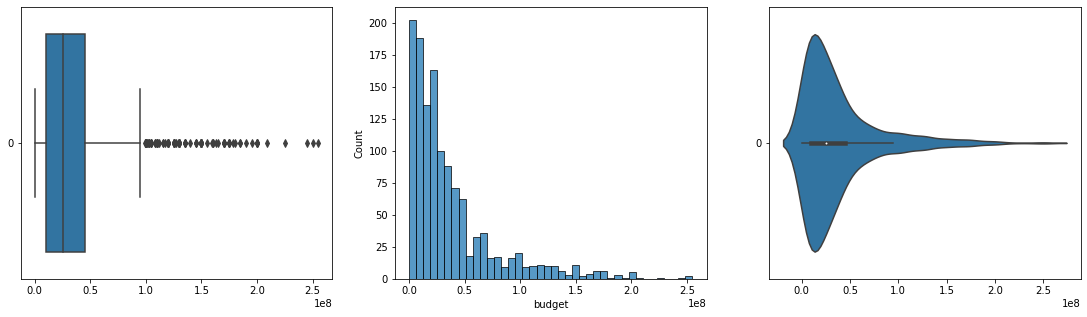

In [41]:
# Budget
f, axes = plt.subplots(1, 3, figsize=(19, 5))

sb.boxplot(data = numDF['budget'], orient = "h", ax = axes[0])
sb.histplot(data = numDF['budget'], ax = axes[1])
sb.violinplot(data = numDF['budget'], orient = "h", ax = axes[2])

**Analysis Univariate Plot of Budget:**
- There seems to be large number of outliers according to the box-plot.
- The plots suggests that the distribution is heavily skewed.
- The plots indicates that 50% of the data lies approximately between 0.1x10^8 to 0.5x10^8.

<AxesSubplot:>

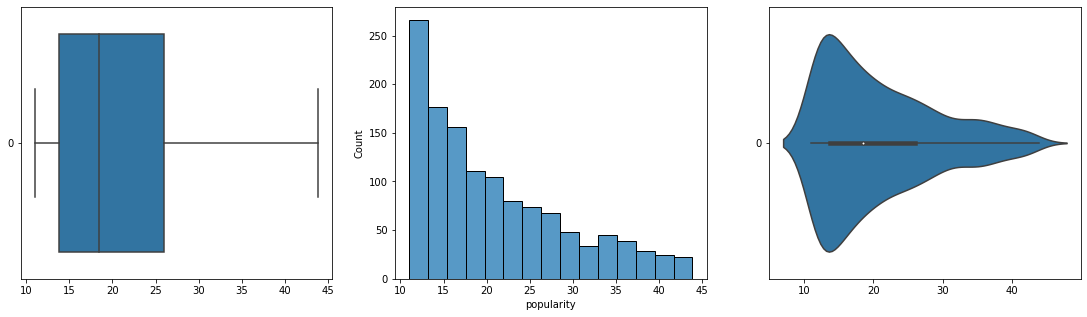

In [42]:
# Popularity
f, axes = plt.subplots(1, 3, figsize=(19, 5))

sb.boxplot(data = numDF["popularity"], orient = "h", ax = axes[0])
sb.histplot(data = numDF["popularity"], ax = axes[1])
sb.violinplot(data = numDF["popularity"], orient = "h", ax = axes[2])

**Analysis Univariate Plot of Popularity:**
- There seems to be a small number of outliers according to the box-plot.
- The plots suggests that the distribution is slightly skewed.
- The plots indicates that 50% of the data lies approximately between 15 to 28.

<AxesSubplot:>

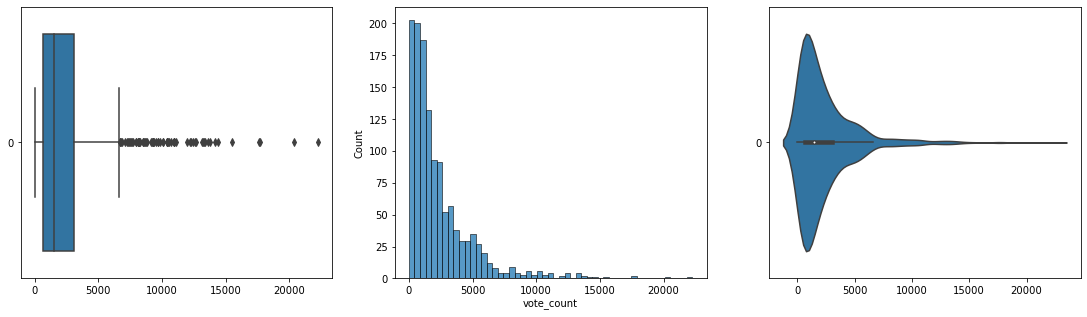

In [43]:
# Vote Count
f, axes = plt.subplots(1, 3, figsize=(19, 5))

sb.boxplot(data = numDF["vote_count"], orient = "h", ax = axes[0])
sb.histplot(data = numDF["vote_count"], ax = axes[1])
sb.violinplot(data = numDF["vote_count"], orient = "h", ax = axes[2])

**Analysis Univariate Plot of Vote Count:**
- There seems to be a significant number of outliers according to the box-plot.
- The plots suggests that the distribution is heavily skewed.
- The plots indicates that 50% of the data lies approximately ranges from 0 to 3500.

<AxesSubplot:>

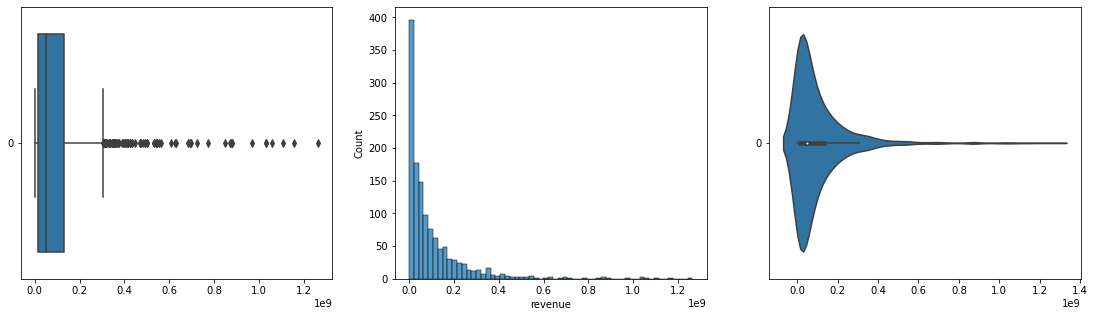

In [44]:
# Revenue
f, axes = plt.subplots(1, 3, figsize=(19, 5))

sb.boxplot(data = numDF["revenue"], orient = "h", ax = axes[0])
sb.histplot(data = numDF["revenue"], ax = axes[1])
sb.violinplot(data = numDF["revenue"], orient = "h", ax = axes[2])

**Analysis Univariate Plot of Revenue:**
- There seems to be a significant number of outliers according to the box-plot.
- The plots suggests that the distribution is heavily skewed.
- The plots indicates that 50% of the data lies approximately ranges from 0 to 0.18x10^9.

<AxesSubplot:>

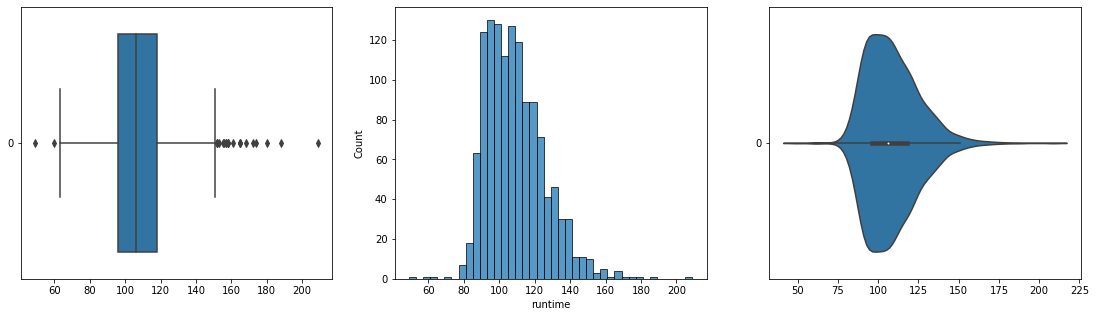

In [45]:
# Runtime
f, axes = plt.subplots(1, 3, figsize=(19, 5))

sb.boxplot(data = numDF["runtime"], orient = "h", ax = axes[0])
sb.histplot(data = numDF["runtime"], ax = axes[1])
sb.violinplot(data = numDF["runtime"], orient = "h", ax = axes[2])

**Analysis Univariate Plot of Runtime:**
- There seems to be a small number of outliers according to the box-plot.
- The plots suggests that the distribution is rather evenly distributed.
- The plots indicates that 50% of the data lies approximately between 90 to 120.

#### Categorical Variables

C:\Users\User\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\User\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


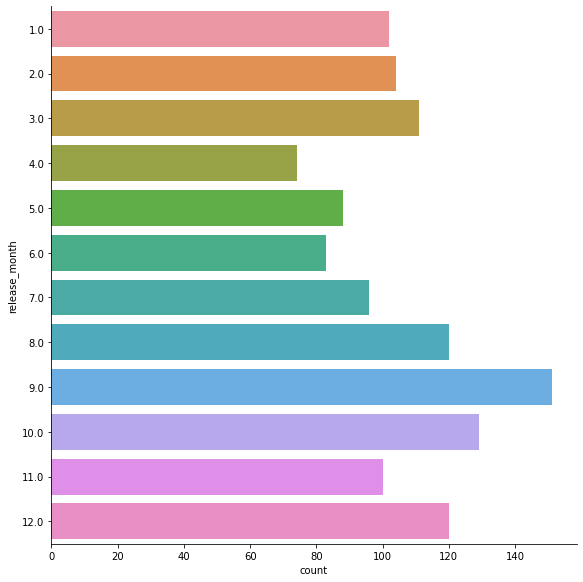

In [46]:
# Release Month
sb.catplot(y = 'release_month', data = df, kind = "count", height = 8)

**Analysis Univariate Plot of Release Month:**
- It seems like more movies are released during Semptember, and least movies released in April.
- More movies tend to be released towards the end of the year.

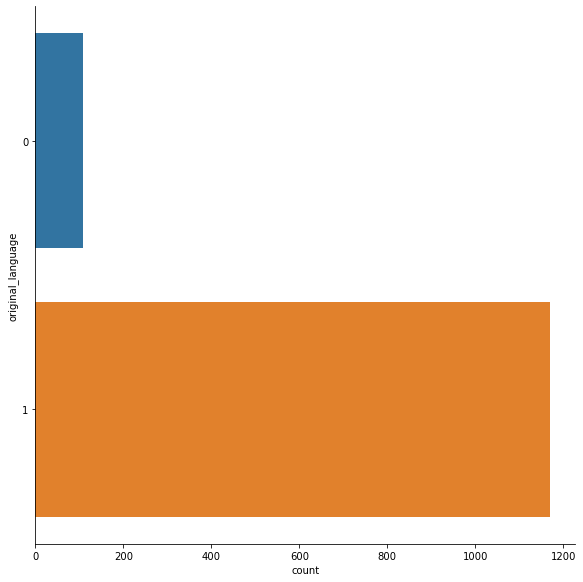

In [47]:
sb.catplot(y = 'original_language', data = df, kind = "count", height = 8)

**Analysis Univariate Plot of Original Language:**
- There is an overwhelming number of English movies compared to non-English movies. This could indicate that it is a determining factor in predicting revenue.

### Multivariate Statistical Analysis
>Let's plot the variables against each other.

### Pearson's Correlation 
>Let's do a correlation plot between the variables to find out how it affects each other.

In [48]:
# Calculate the complete correlation matrix
numDF.corr()

,budget,popularity,vote_count,revenue,runtime
budget,1.000000,0.355458,0.442899,0.666383,0.191361
popularity,0.355458,1.000000,0.460285,0.450695,0.109649
vote_count,0.442899,0.460285,1.000000,0.652486,0.279683
revenue,0.666383,0.450695,0.652486,1.000000,0.131958
runtime,0.191361,0.109649,0.279683,0.131958,1.000000


>For better visualisation, let's plot it with a heatmap.

<AxesSubplot:>

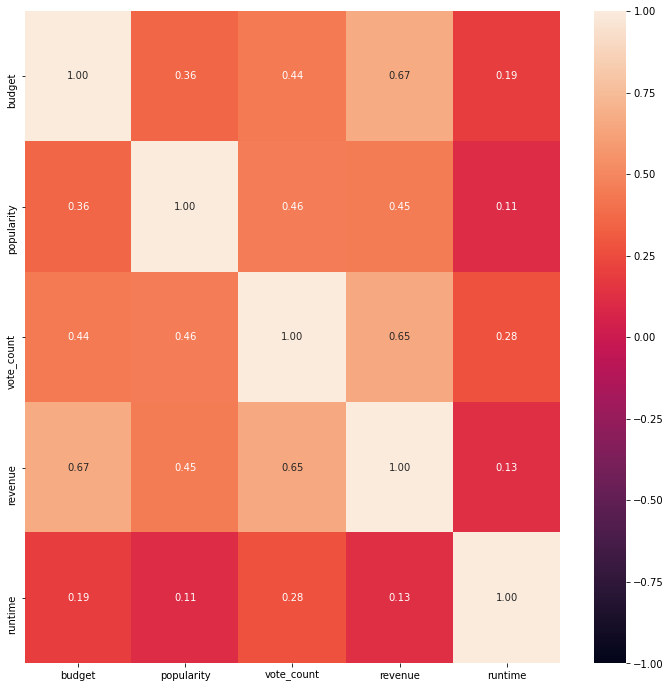

In [49]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

>Correlation Matrix and Heatmap only tells us the correlation value, therefore, to see the actual spread, we shall use a pairplot.

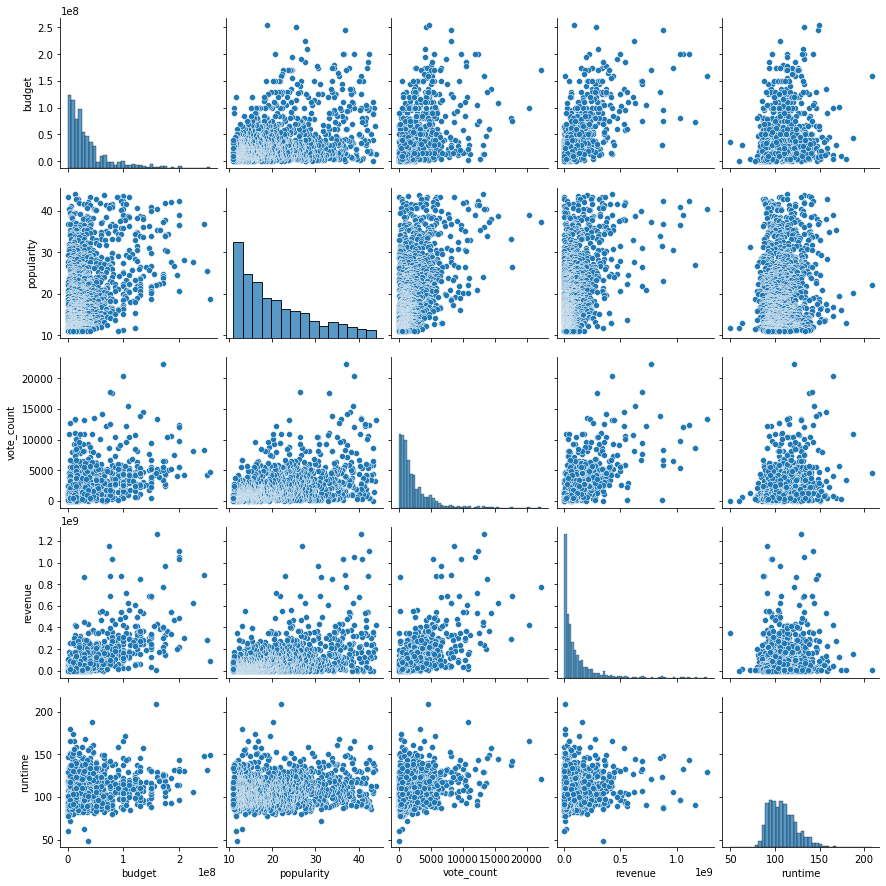

In [50]:
# Draw pairs of variables against one another
sb.pairplot(data = numDF)

**Analysis Of Correlation Matrix:**
- Budget vs Revenue: Strong Positive Correlation
- Popularity vs Revenue: Slight Positive Correlation
- Vote Count vs Revenue: Strong Positive Correlation
- Runtime vs Revenue: Very Weak Positive Correlation

**The correlation indicates that Budget and Vote Count are potentially useful variables to predict revenue, whereas runtime is not as useful in predicting revenue.**

### Boxplots Of Release Month Against Revenue
>Plotting of Categorical against Numerical Data, allows us to compare the spread of revenue against other months.

<AxesSubplot:xlabel='release_month', ylabel='revenue'>

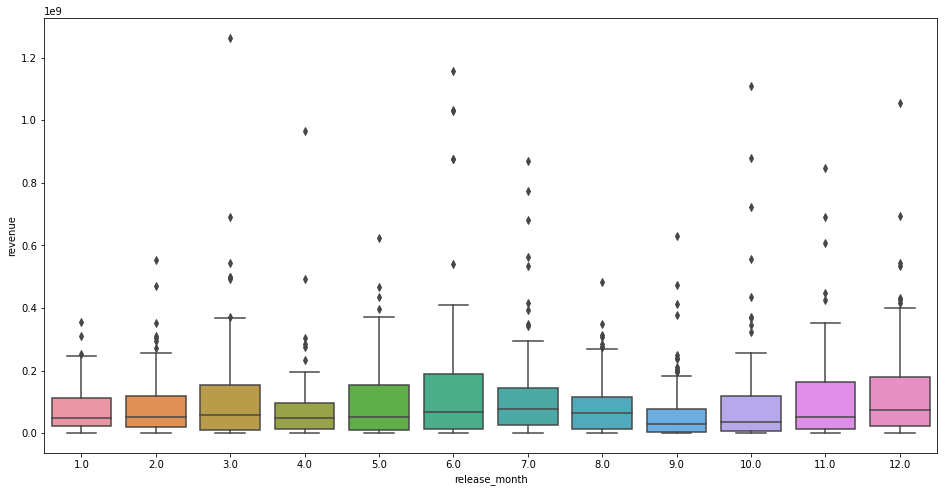

In [51]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'release_month', y = 'revenue', data = df)

**Analysis Of Release Month Against Revenue:**
- The spread of the revenue in June is the widest as compared to April, which has the smallest spread.
- April have the lowest median, while March have the highest median.
- January and February / November and December have rather similar spread and median value. 

**All these does indicate that release_month could be useful in predicting movie revenue**

## 3. Explore Machine Learning with Random Forest Regressor

>Extracting relevant predictors to predict our response variable (revenue).

In [73]:
# Response Dataset
response = pd.DataFrame(df["revenue"])
predictors = pd.DataFrame(df[["genre_list_one_hot", "original_language", "release_month", "vote_count", "budget"]])

In [89]:
from sklearn.model_selection import train_test_split

# Splitting into test and train data
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.36)

### Random Forest Regressor
>Fitting into Random Forest Regressor.

In [90]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200) # n_estimators refers to the number of trees
regressor.fit(X_train, y_train.values.ravel())
y_pred = regressor.predict(X_test)

### Model Accuracy
>Analysis of Model Accuracy. 

In [91]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Explained Variance (R^2) on Test Set \t:", regressor.score(X_test, y_test))

Mean Absolute Error: 47947978.49686551
Mean Squared Error: 6676593464262172.0
Root Mean Squared Error: 81710424.45283327
Explained Variance (R^2) on Test Set 	: 0.7253553872485714


## 4. Predictions
>Now, let's see how well our model fair against other data that the model have not seen before.

In [144]:
# Initialise an empty dataframe
columns = ["film", "release_date", "revenue", "budget", "popularity", "vote_count", "runtime", "genres", "adult", "original_language"]
df_pred = pd.DataFrame(columns=columns)
dfTemp = pd.DataFrame(columns=columns)

>Extraction of data from new pages.

In [229]:
for pageNum in range(40, 45):
    i = i + 1;
    # Call new page to get list of movies
    response = requests.get("https://api.themoviedb.org/3/discover/movie?api_key=34ec81365605658080e05ea53cbf69f2&language=en-US&include_adult=false&include_video=false&page=" + str(pageNum))

    # Store the parsed JSON
    listMovies = response.json()

    # Get list of movies 
    listMovies = listMovies['results']
    
    for movie in listMovies:
        # Get the details of a specific movie
        movie_details = requests.get('https://api.themoviedb.org/3/movie/'+ str(movie['id']) +'?api_key='+ '34ec81365605658080e05ea53cbf69f2'+'&language=en-US')
        movie_details = movie_details.json()
        
        # Append entry into the dataframe
        dfTemp.loc[len(dfTemp)]=[movie['title'], movie_details["release_date"], movie_details['revenue'], movie_details['budget'], movie_details["popularity"], movie_details["vote_count"],\
movie_details["runtime"], movie_details["genres"], movie_details["adult"], movie_details["original_language"]]
    
    # concat temp dataframe into master
    df_pred = pd.concat([df_pred, dfTemp])

    # empty the temp dataframe
    dfTemp = dfTemp[0:0]

>Ensure the newly extracted does not clash with original data.

In [230]:
1# Reset the index
df_pred.reset_index(drop=True, inplace=True)

# print the dataframe
df_pred.head

df_pred2 = df_pred.copy()

# removal of potential movie duplicates
print("Row(s) removed: \n")
for row in range(len(df_pred)):
  for row2 in range(len(df)):
    if df_pred.film.iloc[row] == df.film.iloc[row2]:
      df_pred2 = df_pred2.drop(df_pred2.index[row])
      print("{}\n".format(i))
      break

df_pred = df_pred2.copy()
df_pred.reset_index(drop=True, inplace=True)

Row(s) removed: 

13



>Ensure all the data is valid.

In [231]:
df_pred = df_pred.drop_duplicates(subset=['film'])

# Data cleaning: remove rows with revenue == 0
df_pred = df_pred[df_pred.revenue != 0]

# Data cleaning: remove rows with runtime == 0
df_pred = df_pred[df_pred.budget != 0]

# Data cleaning: remove rows with runtime == 0
df_pred = df_pred[df_pred.popularity != 0]

# Data cleaning: remove rows with runtime == 0
df_pred = df_pred[df_pred.vote_count != 0]

# Data cleaning: remove rows with runtime == 0
df_pred = df_pred[df_pred.runtime != 0]
# print dataframe after data cleaning
df_pred.reset_index(drop=True, inplace=True)
df_pred.head()

,film,release_month,budget,vote_count,original_language,genre_list,release_date,revenue,popularity,runtime,genres,adult
0,The Gentlemen,12.0,22000000,3107,1,"[Action, Comedy, Crime]",NaN,NaN,NaN,NaN,NaN,NaN
1,Crawl,7.0,13500000,2045,1,"[Drama, Horror, Thriller]",NaN,NaN,NaN,NaN,NaN,NaN
2,Charlie's Angels,11.0,48000000,1985,1,"[Action, Adventure, Comedy]",NaN,NaN,NaN,NaN,NaN,NaN
3,Frozen II,11.0,150000000,7233,1,"[Adventure, Animation, Comedy, Family, Fantasy...",NaN,NaN,NaN,NaN,NaN,NaN
4,The Meg,8.0,150000000,5057,1,"[Action, Horror, Science Fiction]",NaN,NaN,NaN,NaN,NaN,NaN


>Extract release_month and release_year.

In [232]:
# Extract release_month and release_year
df_pred['release_month'] = pd.DatetimeIndex(df_pred['release_date']).month
df_pred['release_year'] = pd.DatetimeIndex(df_pred['release_date']).year
df_pred = df_pred[["film", "release_date", "release_year", "release_month", "revenue", "budget", "popularity", "vote_count", "runtime", "genres", "adult", "original_language"]]

df_pred["release_month"] = df_pred["release_month"].astype('category')

>Keep movies that are only released after 2010.

In [233]:
df_pred = df_pred[df_pred.release_year >= 2010]

>Convert relevant data to 'int64' data type.

In [234]:
# Converting to int64
df_pred['revenue'] = df_pred['revenue'].astype('int64')
# Coverting to int64
df_pred['budget'] = df_pred['budget'].astype('int64')
df_pred['vote_count'] = df_pred['vote_count'].astype('int64')
df_pred["runtime"] = df_pred["runtime"].astype('int64')

>Drop adult.

In [235]:
df_pred= df_pred.drop(columns=["adult"])

>Convert language to Boolean.

In [236]:
df_pred["original_language"] = np.where(df_pred["original_language"].str.contains("en"), 1, 0)

df_pred["original_language"] = df_pred["original_language"].astype('category')

# Reset the index
df_pred.reset_index(drop=True, inplace=True)

>Genre manipulation.

In [237]:
dfplay = df_pred.copy()

dfep = pd.DataFrame(dfplay['genres'])

genre_list = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',\
'Thriller', 'TV Movie', 'War', 'Western']
genre_list.sort

dfObj = pd.DataFrame(columns=['genre_list'])

for column in dfep[['genres']]:
  columnSeriesObj = dfep[column]
  columnSeriesObj = list(columnSeriesObj)

  for i in range(len(columnSeriesObj)):
    a = []
    j = len(columnSeriesObj[i])
    for k in range(j):
      a.append(columnSeriesObj[i][k]['name'])
    a = sorted(a)     
    dfObj = dfObj.append({'genre_list': a}, ignore_index=True)


# creates dataframe for encoded values
dfObj_enc = pd.DataFrame(columns=['genre_list_one_hot'])

# performs one-hot encoding
for cat in range(len(columnSeriesObj)):
  total = ''
  cat_index = 0
  str_len = 1
  length = len(dfObj.genre_list.iloc[cat])
  if length == 0:
    total = '0000000000000000000'
    dfObj_enc = dfObj_enc.append({'genre_list_one_hot': total}, ignore_index=True)
    continue
  for index in range(len(genre_list)):
    if dfObj.genre_list.iloc[cat][cat_index] == genre_list[index]:
      total += '1'
      cat_index += 1
    else:
      total += '0'
    if cat_index == length:
      break
    str_len += 1
  for remain in range(len(genre_list) - str_len):
    total += '0' 
  dfObj_enc = dfObj_enc.append({'genre_list_one_hot': total}, ignore_index=True)

# concatenates dataframes
dfObj = pd.concat([dfObj, dfObj_enc], axis=1)
df_pred = pd.concat([df_pred,dfObj], axis = 1)

# changing one-hot encoded values to categorical data
df_pred['genre_list_one_hot'] = df_pred['genre_list_one_hot'].astype('category')

>Predicting newly extracted data.

In [238]:
# Response Dataset
response = pd.DataFrame(df_pred["revenue"])
predictors_pred = pd.DataFrame(df_pred[["genre_list_one_hot", "original_language", "release_month", "vote_count", "budget"]])

In [239]:
# Predict Revenue
revenue_pred = regressor.predict(predictors_pred)
revenue_pred

array([4.73395631e+08, 8.73780487e+08, 6.09939649e+08, 2.50461361e+08,
       2.82839374e+07, 1.58656837e+07, 5.49619918e+07, 2.06740844e+08,
       3.03176204e+08, 8.11068577e+08, 6.36753305e+07, 4.59723882e+07,
       5.69739891e+08, 7.45193308e+06, 6.65194822e+08, 1.35318732e+07,
       2.22962053e+08, 3.95894506e+07, 5.02307285e+08, 8.79666015e+08,
       7.70703570e+08, 2.82076757e+08, 7.75901624e+06, 2.57455610e+08,
       7.60128495e+06, 8.12433324e+06, 5.09393647e+08, 6.19025635e+08,
       3.50519653e+08, 1.15781411e+08, 4.48846351e+08, 5.51465518e+08,
       2.52329336e+08, 1.38702207e+08])

>Based on the movies we have predicted, it looks like we have pretty good predictions. Most of our percentage of errors are less than 20%. This could be attributed to our R^2 value being relatively near 1. There are however some exceptions to the predictions where we get huge errors. This could be attrributed to movies with very low revenue.

In [240]:
# Summarize the Actuals, Predictions and Errors
revenue_pred = pd.DataFrame(revenue_pred, columns = ["PredRevenue"], index = df_pred.index)
revenue_acc = pd.concat([df_pred[["film", "revenue"]], revenue_pred], axis = 1)
# We're calculating the percentage of error made here, error = [(Actual - predicted)/(Actual)] * 100%
y_errs = 100 * abs ( ( revenue_acc["revenue"] - revenue_acc["PredRevenue"] ) / revenue_acc["revenue"] )
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = df_pred.index)
revenue_acc = pd.concat([revenue_acc, y_errs], axis = 1)
revenue_acc['Error'] = revenue_acc['Error'].apply(lambda x: f"{x:.1f}")
revenue_acc['PredRevenue'] = revenue_acc['PredRevenue'].apply(lambda x: f'{x:.1f}')
revenue_acc['Error'] = revenue_acc['Error'].astype('float64')

revenue_acc = revenue_acc.sort_values(by='Error')

# Reset the index
revenue_acc.reset_index(drop=True, inplace=True)
revenue_acc

,film,revenue,PredRevenue,Error
0,Mile 22,66308758,63675330.5,4.0
1,Fantastic Beasts and Where to Find Them,809342332,770703570.4,4.8
2,The Angry Birds Movie 2,131359052,138702207.4,5.6
3,Dunkirk,525573161,569739891.2,8.4
4,How to Train Your Dragon 2,609123048,665194822.2,9.2
5,How to Train Your Dragon,494878759,551465518.3,11.4
6,Love & Other Drugs,102820008,115781410.6,12.6
7,The Amazing Spider-Man,757930663,879666014.8,16.1
8,Monsters University,743559607,619025635.0,16.7
9,Real Steel,299268508,350519652.6,17.1


In [241]:
df_pred = df_pred.drop(["release_date", "release_year", 'runtime', 'genres', 'genre_list_one_hot', 'revenue', 'popularity'], axis=1)
revenue_acc = revenue_acc.drop(["film"], axis=1)
df_finale = pd.concat([df_pred, revenue_acc], axis=1)
df_finale = df_finale[["film", "release_month", "budget", "vote_count", "genre_list", "original_language", \
'revenue', 'PredRevenue', 'Error']]

df_finale = df_finale.sort_values(by='PredRevenue', ascending=False)

# Reset the index
df_finale.reset_index(drop=True, inplace=True)

df_finale

,film,release_month,budget,vote_count,genre_list,original_language,revenue,PredRevenue,Error
0,Power Rangers,3.0,100000000,3550,"[Action, Adventure, Science Fiction]",1,757930663,879666014.8,16.1
1,Fantastic Beasts and Where to Find Them,11.0,180000000,15235,"[Adventure, Fantasy]",1,2068223624,873780487.0,57.8
2,How to Train Your Dragon,3.0,165000000,9919,"[Adventure, Animation, Family, Fantasy]",1,485158,8124333.2,1574.6
3,The Curse of La Llorona,4.0,9000000,1565,"[Horror, Mystery, Thriller]",1,1081041287,811068577.3,25.0
4,The Call of the Wild,2.0,109000000,2423,"[Adventure, Drama, Family]",1,5303,7759016.2,146213.7
5,Star Wars: The Force Awakens,12.0,245000000,15670,"[Action, Adventure, Fantasy, Science Fiction]",1,809342332,770703570.4,4.8
6,Minari,2.0,2000000,233,[Drama],1,4160000,7601285.0,82.7
7,Baywatch,5.0,69000000,6315,"[Action, Comedy, Crime]",1,1292773,7451933.1,476.4
8,Kin,8.0,30000000,549,"[Action, Science Fiction]",1,609123048,665194822.2,9.2
9,Insurgent,3.0,110000000,8297,"[Action, Adventure, Science Fiction, Thriller]",1,66308758,63675330.5,4.0
